# Sklearn

## sklearn.grid_search

документация: http://scikit-learn.org/stable/modules/grid_search.html

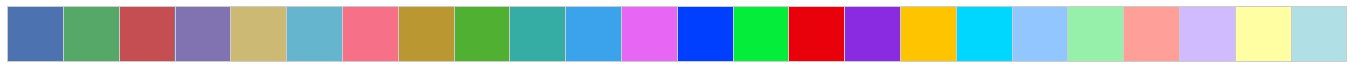

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

color_palette = sns.color_palette('deep') + sns.color_palette('husl', 6) + sns.color_palette('bright') + sns.color_palette('pastel')

%matplotlib inline
sns.palplot(color_palette)

In [3]:
from sklearn import datasets, linear_model, metrics, model_selection as mdsel

### Генерация датасета

In [4]:
iris = datasets.load_iris()

In [6]:
train_data, test_data, train_labels, test_labels = mdsel.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3,random_state = 0)

### Задание модели

In [19]:
classifier = linear_model.SGDClassifier(random_state = 0)

### Генерация сетки

In [20]:
classifier.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'verbose', 'warm_start'])

In [21]:
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'n_iter' : range(5,10),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}

In [28]:
cv = mdsel.StratifiedShuffleSplit(test_size = 0.2, random_state = 0)
cv

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)

### Подбор параметров и оценка качества

#### Grid search

In [73]:
grid_cv = mdsel.GridSearchCV(classifier, parameters_grid, scoring='accuracy', cv=cv, n_jobs=3)

In [74]:
%%time

grid_cv.fit(train_data, train_labels)

Wall time: 4.65 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'penalty': ['l1', 'l2'], 'n_iter': range(5, 10), 'alpha': array([0.0001 , 0.00032, 0.00055, 0.00078, 0.001  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [75]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.000325, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=9,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [76]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8952380952380953
{'alpha': 0.000325, 'loss': 'hinge', 'n_iter': 9, 'penalty': 'l1'}


In [77]:
grid_cv.grid_scores_[:10]

[mean: 0.75714, std: 0.13544, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 5, 'penalty': 'l1'},
 mean: 0.66667, std: 0.15936, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 5, 'penalty': 'l2'},
 mean: 0.61429, std: 0.14357, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 6, 'penalty': 'l1'},
 mean: 0.68571, std: 0.15386, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 6, 'penalty': 'l2'},
 mean: 0.79524, std: 0.16503, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 7, 'penalty': 'l1'},
 mean: 0.70952, std: 0.18982, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 7, 'penalty': 'l2'},
 mean: 0.69524, std: 0.19772, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 8, 'penalty': 'l1'},
 mean: 0.63810, std: 0.17587, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 8, 'penalty': 'l2'},
 mean: 0.84286, std: 0.12608, params: {'alpha': 0.0001, 'loss': 'hinge', 'n_iter': 9, 'penalty': 'l1'},
 mean: 0.78095, std: 0.10690, params: {'alpha': 0.0001, 'loss': 

#### Randomized grid search

In [95]:
randomized_grid_cv = mdsel.RandomizedSearchCV(
    classifier, parameters_grid, scoring='accuracy', cv=cv, n_iter=20, random_state=0
)

In [96]:
%%time
randomized_grid_cv.fit(train_data, train_labels)

Wall time: 479 ms


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
          error_score='raise',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'penalty': ['l1', 'l2'], 'n_iter': range(5, 10), 'alpha': array([0.0001 , 0.00032, 0.00055, 0.00078, 0.001  ])},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [97]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.8142857142857143
{'penalty': 'l1', 'n_iter': 9, 'loss': 'log', 'alpha': 0.00055}
